In [1]:

%pprint
import sys
if (osp.join('..', 'py') not in sys.path): sys.path.insert(1, osp.join('..', 'py'))

Pretty printing has been turned OFF


In [2]:

import os
from FRVRS import (nu, fu, re, display)

In [107]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    display(df.T)

(168528, 108)


,137744,13322,71497,27970
action_type,TOOL_HOVER,TAG_SELECTED,TOOL_HOVER,TOOL_HOVER
action_tick,393636,1584341,120092,824060
event_time,2023-04-21 12:32:00,2023-05-16 16:41:00,2023-05-11 08:46:00,2023-03-03 10:36:00
session_uuid,3bac8365-232a-4be0-a551-c5214b9f0706,724fdf45-3165-43b8-b9ca-dc07102d2886,7994d633-9b4d-475e-8e49-51cb6e4fea4b,e662a811-40fd-4bf2-b9df-d2d221d07b4a
file_name,max15,724fdf45-3165-43b8-b9ca-dc07102d2886,7994d633-9b4d-475e-8e49-51cb6e4fea4b,Marty1
logger_version,1.0,1.0,1.0,1.0
scene_id,1,5,1,2
tool_hover_type,Gauze,NaN,Needle,Needle
tool_hover_count,999,NaN,999,995
tag_selected_type,NaN,green,NaN,NaN



# Location Points

In [6]:

# Get the session with the most responder locations
mask_series = (frvrs_logs_df.action_type == 'PLAYER_LOCATION')
locations_session_uuid, locations_time_group = frvrs_logs_df[mask_series].groupby(
    fu.scene_groupby_columns
).size().sort_values().tail(1).index[0]
base_mask_series = (frvrs_logs_df.session_uuid == locations_session_uuid) & (frvrs_logs_df.scene_id == locations_time_group)

In [42]:

# Find location columns
location_regex = re.compile(r'\((-?\d+\.\d, ){2}-?\d+\.\d\)')
srs = df1.applymap(lambda x: bool(location_regex.fullmatch(str(x))), na_action='ignore').sum()
mask_series = (srs > 0)
location_columns_list = srs[mask_series].index.tolist()
print(location_columns_list)

print(df1.patient_id.unique())
mask_series = False
for cn in location_columns_list:
    mask_series |= ~df1[cn].isnull()
if location_columns_list and df1[mask_series].shape[0]:
    display(df1[mask_series].sample(min(4, df1[mask_series].shape[0])).dropna(axis='columns', how='all').T)
else:
    display(df1.sample(min(4, df1.shape[0])).dropna(axis='columns', how='all').T)

['patient_demoted_position', 'location_id']
['Intelligence Officer Root']


,157506
action_type,PATIENT_DEMOTED
action_tick,460880
event_time,2023-09-11 14:24:52
session_uuid,a3d6d913-7755-4e8d-a174-d5e491c4eac7
file_name,a3d6d913-7755-4e8d-a174-d5e491c4eac7
logger_version,1.3
scene_id,1
patient_demoted_health_level,100
patient_demoted_health_time_remaining,0
patient_demoted_patient_id,Intelligence Officer Root


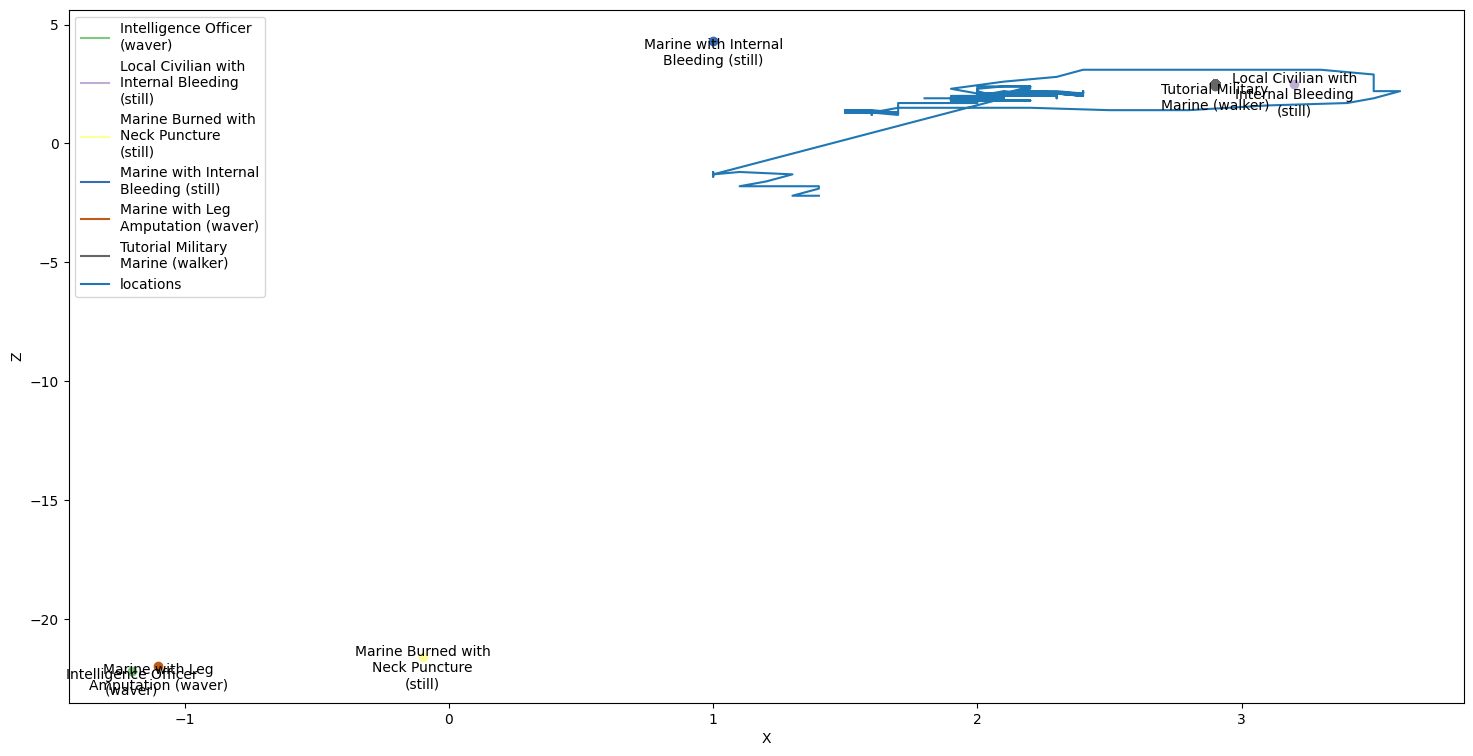

In [126]:

fu.visualize_player_movement(frvrs_logs_df, base_mask_series)

In [61]:

# See how close they get
mask_series = ~frvrs_logs_df.player_gaze_distance_to_patient.isnull()
df = frvrs_logs_df[mask_series].sort_values('player_gaze_distance_to_patient')
farthest_index = df.index.tolist()[-1]
farthest_session_uuid = frvrs_logs_df.loc[farthest_index, 'session_uuid']
farthest_time_group = frvrs_logs_df.loc[farthest_index, 'scene_id']
farthest_mask_series = (frvrs_logs_df.session_uuid == farthest_session_uuid) & (frvrs_logs_df.scene_id == farthest_time_group)
columns_list = [
    'action_type', 'action_tick', 'event_time', 'session_uuid', 'file_name', 'patient_id', 'location_id', 'logger_version',
    'player_gaze_direction_of_gaze', 'scene_id'
]
columns_list = list(set(frvrs_logs_df.columns) - set(columns_list))
df[columns_list].dropna(axis='columns', how='all')

,player_gaze_location,player_gaze_patient_id,player_gaze_distance_to_patient
163654,"(-0.5, 0.0, 3.2)",Helga_6 Root,0.7697665
163657,"(-0.5, 0.0, 3.2)",Helga_6 Root,0.801386
163783,"(-0.5, 0.0, 10.0)",Mike_13 Root,0.8044288
163593,"(1.4, 0.0, 4.0)",Bob_7 Root,0.8047563
165684,"(2.6, 0.0, 2.0)",Lily_5 Root,0.833309
...,...,...,...
163836,"(1.0, 0.0, 19.0)",Lily_11 Root,9.062768
163834,"(1.0, 0.0, 19.0)",Lily_11 Root,9.410751
163327,"(2.0, 0.0, 7.0)",Bob_1 Root,9.514114
163309,"(2.0, 0.0, 7.0)",Bob_1 Root,9.556102


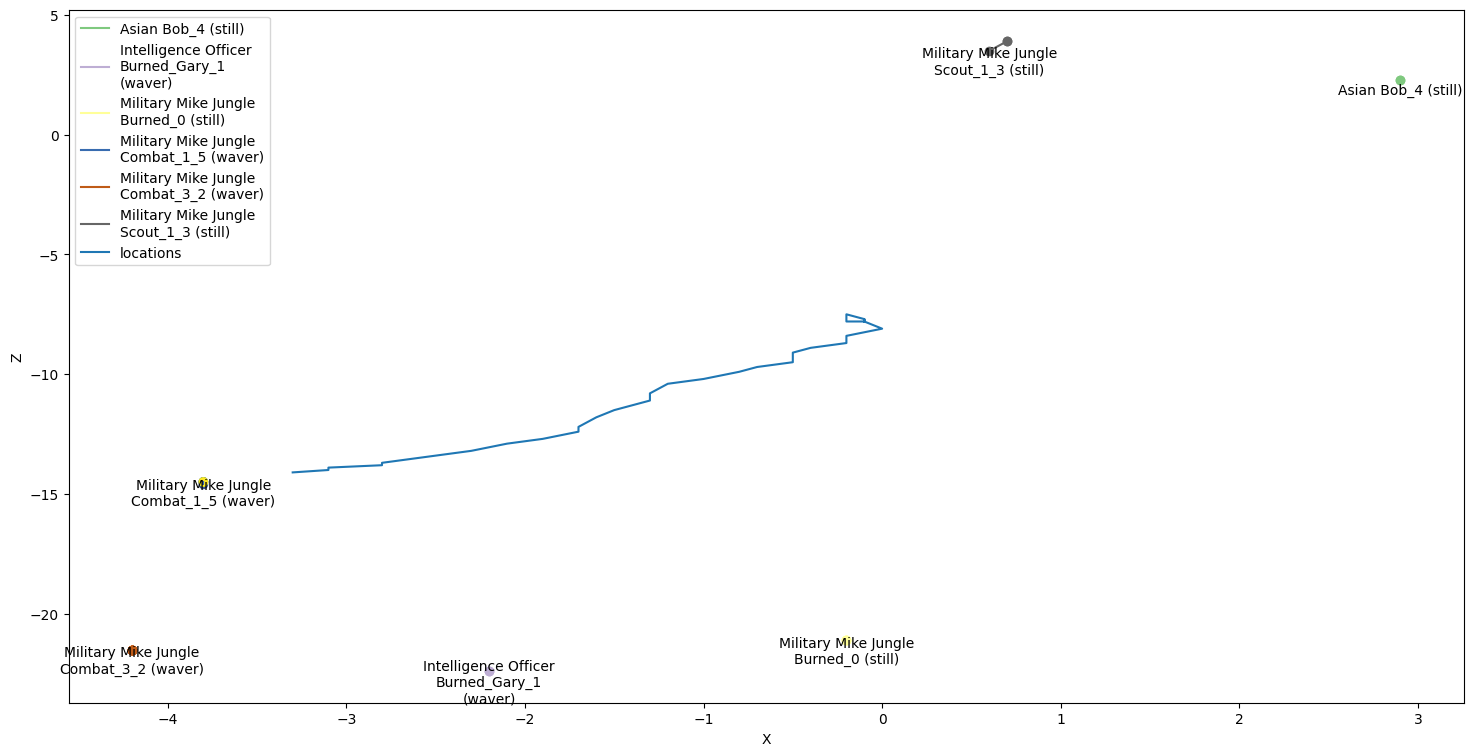

In [65]:

fu.visualize_player_movement(frvrs_logs_df, farthest_mask_series)

In [114]:

# Pick out still patients
columns_list = ['patient_demoted_sort', 'patient_record_sort', 'patient_engaged_sort']
mask_series = False
for cn in columns_list:
    mask_series |= (frvrs_logs_df[cn] == 'still')
# srs = frvrs_logs_df[columns_list].apply(lambda x: (x == 'still'), axis='columns').sum()
# mask_series = (srs > 0)
# df = frvrs_logs_df[mask_series].sort_values('player_gaze_distance_to_patient')
# columns_list = [
#     'action_type', 'action_tick', 'event_time', 'session_uuid', 'file_name', 'patient_id', 'location_id', 'logger_version',
#     'player_gaze_direction_of_gaze', 'scene_id', 'patient_engaged_health_level', 'patient_engaged_pose',
#     'patient_engaged_health_time_remaining', 'patient_record_pose', 'patient_demoted_pose', 'patient_record_salt',
#     'patient_record_mood', 'patient_engaged_salt', 'patient_demoted_salt', 'patient_engaged_hearing', 'patient_engaged_rotation',
#     'patient_demoted_pulse', 'patient_engaged_breath', 'patient_record_breath', 'patient_demoted_health_level',
#     'patient_demoted_breath', 'patient_record_health_time_remaining', 'patient_record_health_level', 'patient_engaged_mood',
#     'patient_record_pulse', 'patient_demoted_mood', 'patient_record_hearing', 'patient_engaged_pulse', 'patient_demoted_hearing',
#     'patient_demoted_health_time_remaining', 'patient_demoted_rotation', 'patient_record_rotation'
# ]
# columns_list = list(set(frvrs_logs_df.columns) - set(columns_list))
# display(df.sample(4)[columns_list].dropna(axis='columns', how='all').T)
tuples_list = fu.get_session_groupby(frvrs_logs_df, mask_series=mask_series, extra_column='scene_id').size().index.tolist()

In [127]:

# Get the index of the farthest gaze distance for each session group
farthest_index_tuples_list = []
for session_tuple in tuples_list:
    mask_series = (frvrs_logs_df.session_uuid == session_tuple[0]) & (frvrs_logs_df.scene_id == session_tuple[1])
    mask_series &= ~frvrs_logs_df.player_gaze_distance_to_patient.isnull()
    df = frvrs_logs_df[mask_series].sort_values('player_gaze_distance_to_patient')
    if df.shape[0]:
        farthest_index = df.index.tolist()[-1]
        session_tuple += (farthest_index,)
        farthest_index_tuples_list.append(session_tuple)
farthest_index_tuples_list = sorted(farthest_index_tuples_list, key=lambda x: x[2])
for index_tuple in farthest_index_tuples_list:
    farthest_session_uuid = index_tuple[0]
    farthest_time_group = index_tuple[1]
    farthest_mask_series = (frvrs_logs_df.session_uuid == farthest_session_uuid)
    farthest_mask_series &= (frvrs_logs_df.scene_id == farthest_time_group)
    farthest_title = f'Player Movement for UUID {farthest_session_uuid} and Scene {farthest_time_group}'
    fu.visualize_player_movement(frvrs_logs_df, farthest_mask_series, title=farthest_title, save_only=True)

In [47]:

# Find the location columns which have Z values greater than ten
location_regex = re.compile(r'\((-?\d+\.\d, ){2}-?\d+\.\d\)')
srs = frvrs_logs_df.applymap(lambda x: bool(location_regex.fullmatch(str(x))), na_action='ignore').sum()
mask_series = (srs > 0)
location_columns_list = srs[mask_series].index.tolist()
print(location_columns_list)

def f(x):
    filter = False
    if location_regex.fullmatch(str(x)):
        filter = (eval(x)[2] > 10.0)

    return filter
ten_list = []
for cn in location_columns_list:
    if any(frvrs_logs_df[cn].map(f)):
        ten_list.append(cn)
ten_list

['teleport_location', 'patient_demoted_position', 'patient_record_position', 'injury_record_injury_injury_locator', 's_a_l_t_walk_if_can_sort_location', 's_a_l_t_walked_sort_location', 's_a_l_t_wave_if_can_sort_location', 's_a_l_t_waved_sort_location', 'patient_engaged_position', 'bag_access_location', 'injury_treated_injury_injury_locator', 'bag_closed_location', 'tag_discarded_location', 'tool_discarded_location', 'player_location_location', 'player_location_left_hand_location', 'player_location_right_hand_location', 'player_gaze_location', 'player_gaze_direction_of_gaze', 'location_id']


['teleport_location', 'patient_demoted_position', 'patient_record_position', 'injury_record_injury_injury_locator', 's_a_l_t_walk_if_can_sort_location', 's_a_l_t_walked_sort_location', 's_a_l_t_wave_if_can_sort_location', 's_a_l_t_waved_sort_location', 'patient_engaged_position', 'bag_access_location', 'injury_treated_injury_injury_locator', 'bag_closed_location', 'tag_discarded_location', 'tool_discarded_location', 'player_location_location', 'player_gaze_location', 'player_gaze_direction_of_gaze', 'location_id']

In [48]:

# View the greater-then-ten y values in each location column
for cn in ten_list:
    mask_series = frvrs_logs_df[cn].map(f)
    df = frvrs_logs_df[mask_series].sample(min(4, frvrs_logs_df[mask_series].shape[0])).dropna(axis='columns', how='all')
    if df.shape[0]:
        print(cn)
        display(df.T)

teleport_location


,77518,77393,143745,21908
action_type,TELEPORT,TELEPORT,TELEPORT,TELEPORT
action_tick,439581,405246,33582,6887525
event_time,2023-06-07 09:44:00,2023-06-07 09:43:00,2023-04-21 10:59:00,2023-05-16 18:09:00
session_uuid,7f639dc1-fce0-4aa9-b76a-c355894d05ed,7f639dc1-fce0-4aa9-b76a-c355894d05ed,3435501b-192a-457f-9763-7985f7975784,724fdf45-3165-43b8-b9ca-dc07102d2886
file_name,7f639dc1-fce0-4aa9-b76a-c355894d05ed,7f639dc1-fce0-4aa9-b76a-c355894d05ed,max4,724fdf45-3165-43b8-b9ca-dc07102d2886
logger_version,1.0,1.0,1.0,1.0
scene_id,2,2,1,15
teleport_location,"(-1.3, 0.0, 10.6)","(-1.3, 0.0, 10.9)","(-0.6, 0.0, 14.7)","(0.9, 0.0, 18.3)"
location_id,"(-1.3, 0.0, 10.6)","(-1.3, 0.0, 10.9)","(-0.6, 0.0, 14.7)","(0.9, 0.0, 18.3)"


patient_demoted_position


,10791,163227,23061,23849
action_type,PATIENT_DEMOTED,PATIENT_DEMOTED,PATIENT_DEMOTED,PATIENT_DEMOTED
action_tick,27896,21023,99103,158878
event_time,2023-05-22 20:23:00,2023-09-11 13:45:26,2023-03-08 13:44:00,2023-05-12 16:45:00
session_uuid,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,845d87c5-7b8b-4bf3-bfc6-91c74e285243,d90f2d85-e91c-4f12-b070-5929d95be1c5
file_name,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,845d87c5-7b8b-4bf3-bfc6-91c74e285243,d90f2d85-e91c-4f12-b070-5929d95be1c5
logger_version,1.0,1.3,1.0,1.0
scene_id,0,0,1,1
patient_demoted_health_level,100,100,100,100
patient_demoted_health_time_remaining,Infinity,Infinity,Infinity,Infinity
patient_demoted_patient_id,Lily_11 Root,Lily_11 Root,Helga_17 Root,Bob_12 Root


patient_record_position


,23884,163279,10827,163284
action_type,PATIENT_RECORD,PATIENT_RECORD,PATIENT_RECORD,PATIENT_RECORD
action_tick,170065,29802,40233,29802
event_time,2023-05-12 16:45:00,2023-09-11 13:45:35,2023-05-22 20:23:00,2023-09-11 13:45:35
session_uuid,d90f2d85-e91c-4f12-b070-5929d95be1c5,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d90f2d85-e91c-4f12-b070-5929d95be1c5,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.0,1.3,1.0,1.3
scene_id,2,1,1,1
patient_record_health_level,100,100,100,100
patient_record_health_time_remaining,Infinity,Infinity,Infinity,Infinity
patient_record_patient_id,Lily_11 Root,Helga_9 Root,Lily_11 Root,Lily_11 Root


injury_record_injury_injury_locator


,7027,7020,163285,163298
action_type,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD
action_tick,625356,625356,29802,29802
event_time,2023-05-12 17:00:00,2023-05-12 17:00:00,2023-09-11 13:45:35,2023-09-11 13:45:35
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,0b891add-e0c3-463d-948d-7f491f1d10ef,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.0,1.0,1.3,1.3
scene_id,4,4,1,1
injury_record_id,Face Shrapnel,L Shin Amputation,L Forearm Laceration,L Calf Shrapnel
injury_record_patient_id,Helga_17 Root,Helga_14 Root,Lily_11 Root,Lily_15 Root
injury_record_required_procedure,airway,tourniquet,gauzePressure,gauzePressure


s_a_l_t_walk_if_can_sort_location


,7271,163346,10861,10913
action_type,S_A_L_T_WALK_IF_CAN,S_A_L_T_WALK_IF_CAN,S_A_L_T_WALK_IF_CAN,S_A_L_T_WALK_IF_CAN
action_tick,836311,39298,52058,62018
event_time,2023-05-12 17:03:00,2023-09-11 13:45:44,2023-05-22 20:23:00,2023-05-22 20:23:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0
file_name,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0
logger_version,1.0,1.3,1.0,1.0
scene_id,5,1,1,1
s_a_l_t_walk_if_can_sort_location,"(-0.4, 0.0, 10.4)","(3.1, 0.0, 28.3)","(-0.4, 0.0, 10.4)","(0.9, 0.0, 10.3)"
s_a_l_t_walk_if_can_sort_command_text,walkIfCan,walkIfCan,walkIfCan,walkIfCan
s_a_l_t_walk_if_can_patient_id,Mike_13 Root,Bob_12 Root,Mike_13 Root,Lily_11 Root


s_a_l_t_walked_sort_location


,7270,7048,10860,10858
action_type,S_A_L_T_WALKED,S_A_L_T_WALKED,S_A_L_T_WALKED,S_A_L_T_WALKED
action_tick,836311,642574,52058,52058
event_time,2023-05-12 17:03:00,2023-05-12 17:00:00,2023-05-22 20:23:00,2023-05-22 20:23:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,0b891add-e0c3-463d-948d-7f491f1d10ef,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0
file_name,0b891add-e0c3-463d-948d-7f491f1d10ef,0b891add-e0c3-463d-948d-7f491f1d10ef,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0
logger_version,1.0,1.0,1.0,1.0
scene_id,5,4,1,1
s_a_l_t_walked_sort_location,"(2.8, 0.0, 28.3)","(1.9, 0.0, 12.0)","(2.8, 0.0, 28.3)","(1.3, 0.0, 19.0)"
s_a_l_t_walked_sort_command_text,walked,walked,walked,walked
s_a_l_t_walked_patient_id,Bob_12 Root,Gary_16 Root,Bob_12 Root,Lily_11 Root


s_a_l_t_wave_if_can_sort_location


,7069,163438,10905,10884
action_type,S_A_L_T_WAVE_IF_CAN,S_A_L_T_WAVE_IF_CAN,S_A_L_T_WAVE_IF_CAN,S_A_L_T_WAVE_IF_CAN
action_tick,653087,55836,61988,59621
event_time,2023-05-12 17:00:00,2023-09-11 13:46:01,2023-05-22 20:23:00,2023-05-22 20:23:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0
file_name,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0
logger_version,1.0,1.3,1.0,1.0
scene_id,4,1,1,1
s_a_l_t_wave_if_can_sort_location,"(-0.2, 0.0, 30.2)","(-0.6, 0.0, 24.8)","(0.9, 0.0, 10.4)","(-0.4, 0.0, 10.4)"
s_a_l_t_wave_if_can_sort_command_text,waveIfCan,waveIfCan,waveIfCan,waveIfCan
s_a_l_t_wave_if_can_patient_id,Lily_15 Root,Helga_14 Root,Lily_11 Root,Mike_13 Root


s_a_l_t_waved_sort_location


,7255,163945,163950,7070
action_type,S_A_L_T_WAVED,S_A_L_T_WAVED,S_A_L_T_WAVED,S_A_L_T_WAVED
action_tick,834389,120785,120785,653087
event_time,2023-05-12 17:03:00,2023-09-11 13:47:06,2023-09-11 13:47:06,2023-05-12 17:00:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,0b891add-e0c3-463d-948d-7f491f1d10ef
file_name,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,0b891add-e0c3-463d-948d-7f491f1d10ef
logger_version,1.0,1.3,1.3,1.0
scene_id,5,1,1,4
s_a_l_t_waved_sort_location,"(1.9, 0.0, 12.0)","(3.1, 0.0, 28.3)","(-0.2, 0.0, 30.2)","(-0.2, 0.0, 30.2)"
s_a_l_t_waved_sort_command_text,waved,waved,waved,waved
s_a_l_t_waved_patient_id,Gary_16 Root,Bob_12 Root,Lily_15 Root,Lily_15 Root


patient_engaged_position


,166094,163713,164007,163983
action_type,PATIENT_ENGAGED,PATIENT_ENGAGED,PATIENT_ENGAGED,PATIENT_ENGAGED
action_tick,463168,92613,134889,128750
event_time,2023-09-11 13:52:48,2023-09-11 13:46:37,2023-09-11 13:47:20,2023-09-11 13:47:14
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.3,1.3,1.3,1.3
scene_id,1,1,1,1
patient_engaged_health_level,100,100,100,100
patient_engaged_health_time_remaining,Infinity,Infinity,Infinity,Infinity
patient_engaged_patient_id,Helga_9 Root,Mike_13 Root,Bob_12 Root,Lily_15 Root


bag_access_location


,142026,164970,132758,166106
action_type,BAG_ACCESS,BAG_ACCESS,BAG_ACCESS,BAG_ACCESS
action_tick,417738,209493,51698,469214
event_time,2023-04-21 12:01:00,2023-09-11 13:48:34,2023-04-21 09:01:00,2023-09-11 13:52:54
session_uuid,efed5e1c-4427-47df-8e3f-9e4714880169,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,3ce991bc-a2d1-46fd-a3a4-d3611e946ed7,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,max17,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,max12,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.0,1.3,1.0,1.3
scene_id,2,1,0,1
bag_access_location,"(3.6, 0.8, 10.3)","(-0.4, 0.4, 24.4)","(2.2, 0.8, 10.4)","(3.0, 0.5, 11.2)"
location_id,"(3.6, 0.8, 10.3)","(-0.4, 0.4, 24.4)","(2.2, 0.8, 10.4)","(3.0, 0.5, 11.2)"


injury_treated_injury_injury_locator


,7505,163806,164910,7477
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
action_tick,984042,101720,195438,965384
event_time,2023-05-12 17:06:00,2023-09-11 13:46:47,2023-09-11 13:48:20,2023-05-12 17:05:00
session_uuid,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,0b891add-e0c3-463d-948d-7f491f1d10ef
file_name,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,0b891add-e0c3-463d-948d-7f491f1d10ef
logger_version,1.0,1.3,1.3,1.0
scene_id,5,1,1,5
injury_treated_id,L Shin Amputation,R Thigh Laceration,L Stomach Puncture,R Thigh Laceration
injury_treated_patient_id,Helga_14 Root,Mike_13 Root,Lily_15 Root,Mike_13 Root
injury_treated_required_procedure,tourniquet,tourniquet,woundpack,tourniquet


bag_closed_location


,165098,163913,138496,164982
action_type,BAG_CLOSED,BAG_CLOSED,BAG_CLOSED,BAG_CLOSED
action_tick,236657,116270,59576,212146
event_time,2023-09-11 13:49:01,2023-09-11 13:47:01,2023-04-21 10:07:00,2023-09-11 13:48:37
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,cf953248-e6cf-4544-95ce-4843d0f56f10,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,max16,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.3,1.3,1.0,1.3
scene_id,1,1,0,1
bag_closed_location,"(0.7, 0.4, 10.7)","(-0.5, 0.5, 24.2)","(3.1, 0.8, 10.6)","(-0.4, 0.4, 24.4)"
location_id,"(0.7, 0.4, 10.7)","(-0.5, 0.5, 24.2)","(3.1, 0.8, 10.6)","(-0.4, 0.4, 24.4)"


tag_discarded_location


,164834
action_type,TAG_DISCARDED
action_tick,179888
event_time,2023-09-11 13:48:05
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.3
scene_id,1
tag_discarded_type,red
tag_discarded_location,"(3.4, 0.3, 28.2)"
location_id,"(3.4, 0.3, 28.2)"


tool_discarded_location


,165070,164350,164066,164395
action_type,TOOL_DISCARDED,TOOL_DISCARDED,TOOL_DISCARDED,TOOL_DISCARDED
action_tick,230124,163783,146170,167682
event_time,2023-09-11 13:48:55,2023-09-11 13:47:49,2023-09-11 13:47:31,2023-09-11 13:47:52
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.3,1.3,1.3,1.3
scene_id,1,1,1,1
tool_discarded_type,Hemostatic Gauze,Hemostatic Gauze,Hemostatic Gauze,Hemostatic Gauze
tool_discarded_count,998,998,998,998
tool_discarded_location,"(0.1, 0.4, 10.7)","(3.5, 0.3, 28.6)","(3.5, 0.3, 28.6)","(3.4, 0.3, 28.6)"


player_location_location


,164862,163793,165013,164842
action_type,PLAYER_LOCATION,PLAYER_LOCATION,PLAYER_LOCATION,PLAYER_LOCATION
action_tick,185319,100699,221374,182247
event_time,2023-09-11 13:48:10,2023-09-11 13:46:45,2023-09-11 13:48:46,2023-09-11 13:48:07
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.3,1.3,1.3,1.3
scene_id,1,1,1,1
player_location_location,"(2.8, 1.0, 26.4)","(-0.1, 0.8, 10.1)","(2.1, 1.2, 11.8)","(3.7, 0.9, 28.0)"
player_location_left_hand_location,"(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)"
player_location_right_hand_location,"(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)"


player_gaze_location


,164932,164925,164353,164000
action_type,PLAYER_GAZE,PLAYER_GAZE,PLAYER_GAZE,PLAYER_GAZE
action_tick,199562,198011,163883,133352
event_time,2023-09-11 13:48:24,2023-09-11 13:48:23,2023-09-11 13:47:49,2023-09-11 13:47:18
session_uuid,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.3,1.3,1.3,1.3
scene_id,1,1,1,1
player_gaze_location,"(0.0, 0.0, 30.0)","(0.0, 0.0, 30.0)","(3.0, 0.0, 28.0)","(3.0, 0.0, 28.0)"
player_gaze_patient_id,Lily_15 Root,Lily_15 Root,Bob_12 Root,Bob_12 Root
player_gaze_distance_to_patient,0.9573293,1.014863,1.007163,1.920844


player_gaze_direction_of_gaze


,166322,164991,166727,166749
action_type,PLAYER_GAZE,PLAYER_GAZE,PLAYER_GAZE,PLAYER_GAZE
action_tick,25711,214289,24732,32830
event_time,2023-09-07 13:55:49,2023-09-11 13:48:39,2023-09-07 15:33:36,2023-09-07 15:33:44
session_uuid,ebc4fb38-01c3-4296-b22d-34adf70e0d43,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,f8b5cbd1-0abe-483b-8b16-956044dc0119,f8b5cbd1-0abe-483b-8b16-956044dc0119
file_name,ebc4fb38-01c3-4296-b22d-34adf70e0d43,d9d58da9-9bdc-41ea-90fe-4c84db4635d9,f8b5cbd1-0abe-483b-8b16-956044dc0119,f8b5cbd1-0abe-483b-8b16-956044dc0119
logger_version,1.3,1.3,1.3,1.3
scene_id,1,1,1,1
player_gaze_location,"(-4.2, 0.2, -21.5)","(-0.5, 0.0, 10.0)","(-4.2, 0.2, -21.5)","(-4.2, 0.2, -21.5)"
player_gaze_patient_id,Military Mike Jungle Combat_3_2 Root,Mike_13 Root,Military Mike Jungle Combat_3_2 Root,Military Mike Jungle Combat_3_2 Root
player_gaze_distance_to_patient,10.59023,13.85525,14.43207,10.89839


location_id


,10905,49814,7228,163286
action_type,S_A_L_T_WAVE_IF_CAN,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD
action_tick,61988,1125038,821240,29802
event_time,2023-05-22 20:23:00,2023-03-03 13:39:00,2023-05-12 17:03:00,2023-09-11 13:45:35
session_uuid,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,e8cb6ae0-6d68-410f-88fc-4adf30d8bfac,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
file_name,5fa79a8e-a2df-4bb9-b614-f3ce36a5edb0,Marty8,0b891add-e0c3-463d-948d-7f491f1d10ef,d9d58da9-9bdc-41ea-90fe-4c84db4635d9
logger_version,1.0,1.0,1.0,1.3
scene_id,1,3,5,1
injury_record_id,NaN,L Stomach Puncture,L Wrist Amputation,L Bicep Puncture
injury_record_patient_id,NaN,Lily_15 Root,Helga_17 Root,Lily_11 Root
injury_record_required_procedure,NaN,woundpack,tourniquet,tourniquet


In [ ]:

# Find location columns that haven't been collapsed into location ID
location_regex = re.compile(r'\((-?\d\.\d, ){2}-?\d\.\d\)')
srs = frvrs_logs_df.applymap(lambda x: bool(location_regex.fullmatch(str(x))), na_action='ignore').sum()
mask_series = (srs != 0)
location_columns_list = srs[mask_series].index.tolist()
mask_series = False
for cn in location_columns_list:
    mask_series |= ~frvrs_logs_df[cn].isnull()
mask_series &= frvrs_logs_df.location_id.isnull()
df = frvrs_logs_df[mask_series].sample(min(4, frvrs_logs_df[mask_series].shape[0])).dropna(axis='columns', how='all')
df.T

In [ ]:

# Prove that all player locations have zero in the y dimension
def f(x):
    filter = False
    if location_regex.fullmatch(str(x)):
        filter = (eval(x)[1] != 0.0)

    return filter
nonzero_list = []
for cn in location_columns_list:
    if any(frvrs_logs_df[cn].map(f)):
        nonzero_list.append(cn)
print(nonzero_list)
columns_list= [
    'player_location_location', 'patient_demoted_position', 'patient_record_position', 'injury_record_injury_injury_locator',
    's_a_l_t_walk_if_can_sort_location', 's_a_l_t_walked_sort_location', 's_a_l_t_wave_if_can_sort_location',
    's_a_l_t_waved_sort_location', 'patient_engaged_position', 'bag_access_location', 'injury_treated_injury_injury_locator',
    'bag_closed_location', 'tag_discarded_location', 'tool_discarded_location', 'player_location_location',
    'player_gaze_location'
]
set(nonzero_list) - set(columns_list)

In [ ]:

# View the non-zero y values in each location column
def f(x):
    filter = False
    if location_regex.fullmatch(str(x)):
        filter = (eval(x)[1] != 0.0)

    return filter
for cn in nonzero_list:
    mask_series = frvrs_logs_df[cn].map(f) & (frvrs_logs_df.logger_version == 1.0)
    df = frvrs_logs_df[mask_series].sample(min(4, frvrs_logs_df[mask_series].shape[0])).dropna(axis='columns', how='all')
    if df.shape[0]:
        print(cn)
        display(df.T)

In [ ]:

mask_series = (frvrs_logs_df.logger_version == 1.3)
df = frvrs_logs_df[mask_series]
df.sample(min(4, frvrs_logs_df[mask_series].shape[0])).dropna(axis='columns', how='all').T

In [ ]:

# Verify that the Left and Right hand location are deactivated in v1.3 - that they will always have a 0 vector
mask_series = (frvrs_logs_df.logger_version == 1.3) & (frvrs_logs_df.action_type == 'PLAYER_LOCATION')
columns_list = ['player_location_left_hand_location', 'player_location_right_hand_location']
df = frvrs_logs_df[mask_series][columns_list]
df.drop_duplicates()

In [ ]:

mask_series = frvrs_logs_df.location_id.isnull()
frvrs_logs_df[~mask_series].sample(5).dropna(axis='columns', how='all').T

In [ ]:

# Get the list of columns that have 3D coordinates as values in them
location_regex = re.compile(r'\((-?\d\.\d, ){2}-?\d\.\d\)')
srs = frvrs_logs_df.applymap(lambda x: bool(location_regex.fullmatch(str(x))), na_action='ignore').sum()
mask_series = (srs != 0)
location_columns_list = srs[mask_series].index.tolist()
location_columns_list